# Mushroom Classification
I will use a public dataset from kaggle.com, the "Mushroom Classificatio" dataset, and try to find if mushroom is edible or not. 
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms.When want to eat mushrooms, there is no simple rule for determining the edibility.

I will use this classification problem using Logistic Regression, Ridge Classifier, Decision Tree, Naive Bayes, and Neural Networks.

#### Importing required libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Import Label encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


## Dataset and preprocessing
There are 8124 mushrooms in the dataset.Eachs of these mushrooms has 22 features and they are categroized as edible or not.

### Read the data

In [14]:
dataset = pd.read_csv("mushrooms.csv")

In [15]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
classes = dataset["class"].value_counts()
classes

class
e    4208
p    3916
Name: count, dtype: int64

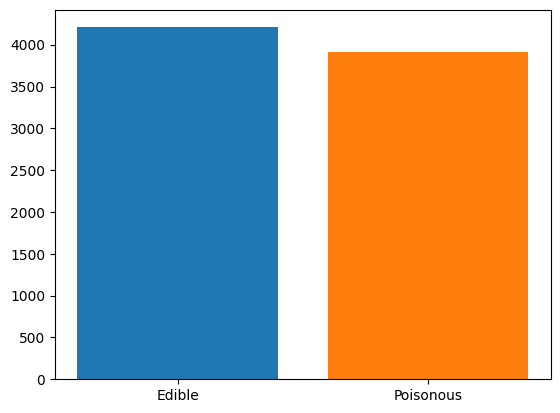

In [17]:
plt.bar("Edible",classes["e"])
plt.bar("Poisonous",classes["p"])
plt.show()

### Features and Labels

In [22]:
x = dataset.loc[:, ["cap-shape", "cap-color", "ring-number", "ring-type"]]
y = dataset.loc[:,"class"]

In [29]:
x.head()

,cap-shape,cap-color,ring-number,ring-type
0,x,n,o,p
1,x,y,o,p
2,b,w,o,p
3,x,w,o,p
4,x,g,o,e


In [25]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

### Converting the values
The values are in string format. I need to contert to integer values to be able to calculate mathematical operations with them.

In [31]:
encoder = LabelEncoder()

for i in x.columns:
    x[i] = encoder.fit_transform(x[i])

y = encoder.fit_transform(y)

In [33]:
x.head()

,cap-shape,cap-color,ring-number,ring-type
0,5,4,1,4
1,5,9,1,4
2,0,8,1,4
3,5,8,1,4
4,5,3,1,0


In [35]:
y

array([1, 0, 0, ..., 0, 1, 0])

### Split Data

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

### Creating and Training Models


In [37]:
# Create an object using the LogisticRegression() class
logistic_regressin = LogisticRegression()


# Create an object using the RidgeClassifier() class
ride_classifier = RidgeClassifier()

# Create an object using the DecisionTreeClassifier() class
decision_tree = DecisionTreeClassifier()

# Create an object using the GaussianNB() class
naive_bayes = GaussianNB()

# Create an object using the MLPClassifier() class
neural_network = MLPClassifier()

In [38]:
# Train the Logistic Classifier model
logistic_regressin.fit(x_train,y_train)

# Train the Ridge Classifier model
ride_classifier.fit(x_train,y_train)

# Train the Decision Tree model
decision_tree.fit(x_train,y_train)

# Train the Naive Bayes model
naive_bayes.fit(x_train,y_train)

# Train the Neural Network model
neural_network.fit(x_train,y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

### Prediction

In [39]:
# Make prediction using the test dataset on Logistic Classifier model
logisttic_pred = logistic_regressin.predict(x_test)

# Make prediction using the test dataset on Ridge Classifier model
ridge_pred = ride_classifier.predict(x_test)

# Make prediction using the test dataset on Decision Tree model
decision_pred = decision_tree.predict(x_test)

# Make prediction using the test dataset on Naive Bayes model
naive_pred = naive_bayes.predict(x_test)

# Make prediction using the test dataset on Neural Network model
neural_pred = neural_network.predict(x_test)

### Comparing the Performances

In [42]:
from sklearn.metrics import classification_report
# Create a Classification Report for Logistic Classifier model
logistic_report = classification_report(y_test,logisttic_pred)

# Create a Classification Report for Ridge Classifier model
ridge_report = classification_report(y_test,ridge_pred)

# Create a Classification Report for Decision Tree model
decision_report = classification_report(y_test,decision_pred)

# Create a Classification Report for Naive Bayes model
naive_report = classification_report(y_test,naive_pred)

# Create a Classification Report for Neural Network model
neural_report = classification_report(y_test,neural_pred)

In [44]:
# Print the report of the Logistic Regression model
print("Logistic Regression")
print(logistic_report)

# Print the report of the Ridge Regression model
print("Ridge Regression")
print(ridge_report)

# Print the report of the Decision Tree model
print("Decision Tree")
print(decision_report)
# Print the report of the Naive Bayes model
print("Naive Bayes")
print(naive_report)
# Print the report of the Neural Network model
print("Neural Network")
print(neural_report)

Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1279
           1       0.79      0.81      0.80      1159

    accuracy                           0.81      2438
   macro avg       0.81      0.81      0.81      2438
weighted avg       0.81      0.81      0.81      2438

Ridge Regression
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1279
           1       0.79      0.81      0.80      1159

    accuracy                           0.81      2438
   macro avg       0.81      0.81      0.81      2438
weighted avg       0.81      0.81      0.81      2438

Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1279
           1       0.89      0.93      0.91      1159

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91

### Random Forest Algorithm

In [46]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

random_forest_predict = random_forest.predict(x_test)

random_forest_report = classification_report(y_test,random_forest_predict)
print(random_forest_report)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1279
           1       0.89      0.93      0.91      1159

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438

